# Soal Ujian Module 2 Purwadhika

### 1. Import the libraries (pandas,numpy, matplotlib.pyplot, seaborn, math)

#### Use random.seed(101)

In [1]:
import pandas as pd
import numpy as np
from numpy import random 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

np.random.seed(101)

### 2. Load Titanic Dataset from Seaborn and show the .head() of the dataset

In [2]:
df_titanic = sns.load_dataset('titanic')
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Show the info of the dataframe using .info()

In [3]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 4. Describe the dataframe using .describe()

In [4]:
df_titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 5. Make Table like this to describe the dataframe

#### Columns Explanations :
 - __dataFeatures__ = column name
 - __dataType__ = data type of that column
 - __null__ = how many null data in that column/series
 - __nullPct__ = null percentage of total data in that column
 - __unique__ = how many unique data
 - __uniqueSample__ = get some unique sample from each column

#### hint : search .sample(), .drop_duplicates(), .values, .isna(), dtype

In [5]:
data_t=[]
for item in df_titanic.columns:
    if not(item == 'class' or item == 'deck'):
        data_t.append([
                item, np.dtype(df_titanic[item]),df_titanic[item].isna().sum(),df_titanic[item].isna().sum()/len(df_titanic[item])*100,
                df_titanic[item].nunique(),df_titanic[item].unique()
                ])
df_titanic2 = pd.DataFrame(data=data_t, columns=['dataFeatures', 'DataType','null','nullPct','unique','uniqueSample'])
df_titanic2

,dataFeatures,DataType,null,nullPct,unique,uniqueSample
0,survived,int64,0,0.000000,2,"[0, 1]"
1,pclass,int64,0,0.000000,3,"[3, 1, 2]"
2,sex,object,0,0.000000,2,"[male, female]"
3,age,float64,177,19.865320,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,..."
4,sibsp,int64,0,0.000000,7,"[1, 0, 3, 4, 2, 5, 8]"
5,parch,int64,0,0.000000,7,"[0, 1, 2, 5, 3, 4, 6]"
6,fare,float64,0,0.000000,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51...."
7,embarked,object,2,0.224467,3,"[S, C, Q, nan]"
8,who,object,0,0.000000,3,"[man, woman, child]"
9,adult_male,bool,0,0.000000,2,"[True, False]"


### 6. Groupby

_Group By Sex (Mean)_

In [6]:
df_titanic.groupby(['sex']).mean()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818,0.000000,0.401274
male,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893,0.930676,0.712305


_Group By Sex (standard deviation)_

In [7]:
df_titanic.groupby(['sex']).std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
sex,,,,,,,,
female,0.438211,0.85729,14.110146,1.156520,1.022846,57.997698,0.000000,0.490939
male,0.391775,0.81358,14.678201,1.061811,0.612294,43.138263,0.254225,0.453081


_Group By Sex (Minimum value)_

In [8]:
df_titanic.groupby(['sex']).min()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,0,1,0.75,0,0,6.75,child,False,no,False
male,0,1,0.42,0,0,0.00,child,False,no,False


_Group By Sex (Maximum value)_

In [9]:
df_titanic.groupby(['sex']).max()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,alone
sex,,,,,,,,,,
female,1,3,63.0,8,6,512.3292,woman,False,yes,True
male,1,3,80.0,8,5,512.3292,man,True,yes,True


_Group By Sex (Count)_

In [10]:
df_titanic.groupby(['sex']).count()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
sex,,,,,,,,,,,,,,
female,314,314,261,314,314,314,312,314,314,314,97,312,314,314
male,577,577,453,577,577,577,577,577,577,577,106,577,577,577


_Group By Sex (Describe Transpose)_

In [11]:
df_titanic.groupby(['sex']).describe().T

sex                 female        male
age      count  261.000000  453.000000
         mean    27.915709   30.726645
         std     14.110146   14.678201
         min      0.750000    0.420000
         25%     18.000000   21.000000
         50%     27.000000   29.000000
         75%     37.000000   39.000000
         max     63.000000   80.000000
fare     count  314.000000  577.000000
         mean    44.479818   25.523893
         std     57.997698   43.138263
         min      6.750000    0.000000
         25%     12.071875    7.895800
         50%     23.000000   10.500000
         75%     55.000000   26.550000
         max    512.329200  512.329200
parch    count  314.000000  577.000000
         mean     0.649682    0.235702
         std      1.022846    0.612294
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      6.000000    5.000000
pclass   count  314.000000  577.000000
         mean     2.159236    2.389948
         std      0.857290    0.813580
         min      1.000000    1.000000
         25%      1.000000    2.000000
         50%      2.000000    3.000000
         75%      3.000000    3.000000
         max      3.000000    3.000000
sibsp    count  314.000000  577.000000
         mean     0.694268    0.429809
         std      1.156520    1.061811
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      0.000000    0.000000
         75%      1.000000    0.000000
         max      8.000000    8.000000
survived count  314.000000  577.000000
         mean     0.742038    0.188908
         std      0.438211    0.391775
         min      0.000000    0.000000
         25%      0.000000    0.000000
         50%      1.000000    0.000000
         75%      1.000000    0.000000
         max      1.000000    1.000000

### 7. Filter

#### Berapa banyak jumlah datanya kalau datanya cuma class = First dan class = Third ?

#### Berapa mean umur pria dari campuran class First dan Third?

#### lalu munculkan 5 data teratas dari filter tersebut dan cuma kolom sex dan age aja yang muncul

In [12]:
print("Jumlah Data :" + str(df_titanic[df_titanic['class'].str.contains('First', case=False) + (df_titanic['class'] == 'Third')]['class'].count()))
print('Mean Umur Pria: '+ str(df_titanic[df_titanic['sex'] == 'male']['age'].mean()))


Jumlah Data :707
Mean Umur Pria: 30.72664459161148


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


#### Berapa total fare dari penumpang yang second class dan sendirian?

In [13]:
df_titanic[(df_titanic['class'] == 'Second') & (df_titanic['alone'] == 1)]['fare'].sum()

1462.875

### 8. Missing Values
#### Berapa banyak NaN age data dan mean dari setiap who?
#### Isi data NaN dari kolom age dengan mean dari umur tergantung whonya dia apa (child/woman/man)
#### Kemudian print banyak NaN age data dan mean umur setiap who lagi.

In [14]:
df_titanic['age'].fillna(round(df_titanic['age'].mean()), inplace = True)

In [15]:
a = df_titanic[df_titanic['who'] == 'man']['age'].isna().sum()
b = df_titanic[df_titanic['who'] == 'woman']['age'].isna().sum()
c = df_titanic[df_titanic['who'] == 'child']['age'].isna().sum()

print('Banyak Nan man & mean: '+ str(a) + " & " + str(df_titanic[df_titanic['who'] == 'man']['age'].mean()))
print('Banyak Nan woman & mean: '+ str(b) + " & " + str(df_titanic[df_titanic['who'] == 'woman']['age'].mean()))
print('Banyak Nan child & mean: '+ str(c) + " & " + str(df_titanic[df_titanic['who'] == 'child']['age'].mean()))


Banyak Nan man & mean: 0 & 32.440409683426445
Banyak Nan woman & mean: 0 & 31.608856088560884
Banyak Nan child & mean: 0 & 6.369518072289157


#### Isi NaN embarked dan embark_town dan deck dengan modus masing2 (print modus masing2 juga)

In [16]:
df_titanic['embarked'].mode()


0    S
dtype: object

In [17]:
df_titanic['embarked'].fillna('S', inplace=True)

In [18]:
df_titanic['embark_town'].mode()

0    Southampton
dtype: object

In [19]:
df_titanic['embark_town'].fillna('Southampton', inplace=True)

In [20]:
df_titanic['deck'].mode()

0    C
Name: deck, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [21]:
df_titanic['deck'].fillna('C', inplace=True)

#### Last Print the dataframe info to check if there is still NaN values

In [22]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            891 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       891 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           891 non-null category
embark_town    891 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### 9. Adding New Features/Columns/Variables

#### Buat DataFrame baru dengan column2 sebagai berikut
 - __id__ = id table ini (PK)
 - __mean_fare__ = Mean Fare
 - __std_fare__ = Std Fare
 - __batas_min_fare__ = Mean Fare - (3 x Std Fare)
 - __batas_max_fare__ = Mean Fare + (3 x Std Fare)
 
#### Dan data2nya ada 3 (fare setiap class yaitu first, second, and third class)

In [23]:
dftitanicOutCalc =pd.DataFrame(data=[[1,'84.154687','78.380373','-150.986430','319.295805'],
                                     [2,'20.662183','13.417399','-19.590013','60.914379'],
                                     [3,'13.675550','11.778142','-21.658875','49.009975']],columns=['id', 'mean_fare','std_fare','batas_min_fare','batas_max_fare'])
dftitanicOutCalc

,id,mean_fare,std_fare,batas_min_fare,batas_max_fare
0,1,84.154687,78.380373,-150.986430,319.295805
1,2,20.662183,13.417399,-19.590013,60.914379
2,3,13.675550,11.778142,-21.658875,49.009975


#### Print outlier % of each class

In [24]:
first = 84.154687/78.380373
second = 20.662183/13.417399
third = 13.675550/11.778142

print(first,second,third)




1.073670407258715 1.5399544278291195 1.1610956974368283


#### Tambahkan column outliercalcId (FK) di dfTitanic

In [25]:
df_titanic['outliercalcId'] = df_titanic['pclass']
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [26]:
df_titanic['outliercalcId'].value_counts()

3    491
1    216
2    184
Name: outliercalcId, dtype: int64

#### Tambahkan column outlier (1 for yes and 0 for no)

In [27]:
df_titanic['outlier'] = df_titanic['sibsp']
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,outliercalcId,outlier
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,3,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,3,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,0


In [28]:
df_titanic['outlier'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: outlier, dtype: int64

### 10. Export both dataFrames to csv (Titanic.csv, TitanicOutCalc.csv)

In [29]:
df_titanic.to_csv('Titanic.csv',index=False)
dftitanicOutCalc.to_csv('TitanicOutCalc.csv',index=False)

### 11. Buatlah plot2 dibawah menggunakan seaborn

#### a. Heatmap dari correlation dfTitanic (color=coolwarm, plt.figure(figsize=(10,5))

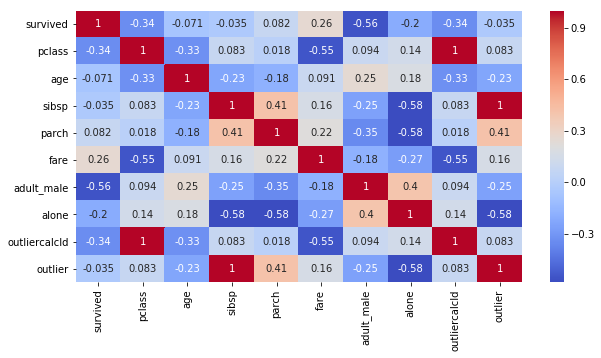

In [30]:
plt.figure(figsize=(10,5))
sns.heatmap(df_titanic.corr(),cmap='coolwarm',annot=True)

#### b. buatlah countplot seperti dibawah (style=whitegrid, palette=rainbow)

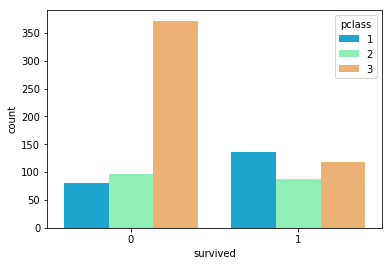

In [31]:
sns.countplot(x='survived', hue='pclass',data=df_titanic,palette='rainbow')

#### c. buatlah histogram age dibawah (color=darkred,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


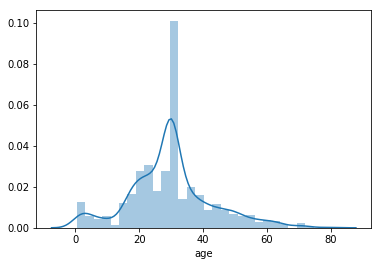

In [32]:
sns.distplot(df_titanic['age'])

# Goodluck Guys!! Salam Bertasbih!